In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = pd.read_csv('Data/Final/X_train_sc.csv')
X_test = pd.read_csv('Data/Final/X_test_sc.csv')
y_train = pd.read_csv('Data/Final/y_train_sc.csv')
y_test = pd.read_csv('Data/Final/y_test_sc.csv')

In [3]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31324, 12), (16868, 12), (31324, 1), (16868, 1))

In [4]:
train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)

In [5]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
n_steps = 40

In [7]:
X_train,y_train = split_sequences(train.to_numpy(),n_steps=n_steps)
X_test,y_test = split_sequences(test.to_numpy(),n_steps=n_steps)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31284, 40, 13), (16828, 40, 13), (31284, 13), (16828, 13))

In [9]:
from tensorflow import keras

In [10]:
model = keras.models.load_model('Data/Models/lstm2_regression.h5')

In [58]:
import pickle

In [59]:
sc_y = pickle.load(open('Data/y_scaler.pkl', 'rb'))

### Forecasting for the next day

In [49]:
X_input = X_test[-300:]
X_input.shape

(300, 40, 13)

In [50]:
y_input = y_test[-300:]
y_input.shape

(300, 13)

In [51]:
y_pred = model.predict(X_input)

In [52]:
y_pred.shape

(300, 13)

In [67]:
before_aqi = sc_y.inverse_transform(y_test[-330:-300,-1].reshape(-1, 1))
true_aqi = sc_y.inverse_transform(y_input[:,-1].reshape(-1, 1))
pred_aqi = sc_y.inverse_transform(y_pred[:,-1].reshape(-1, 1))

In [68]:
before_aqi.shape,true_aqi.shape,pred_aqi.shape

((30, 1), (300, 1), (300, 1))

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

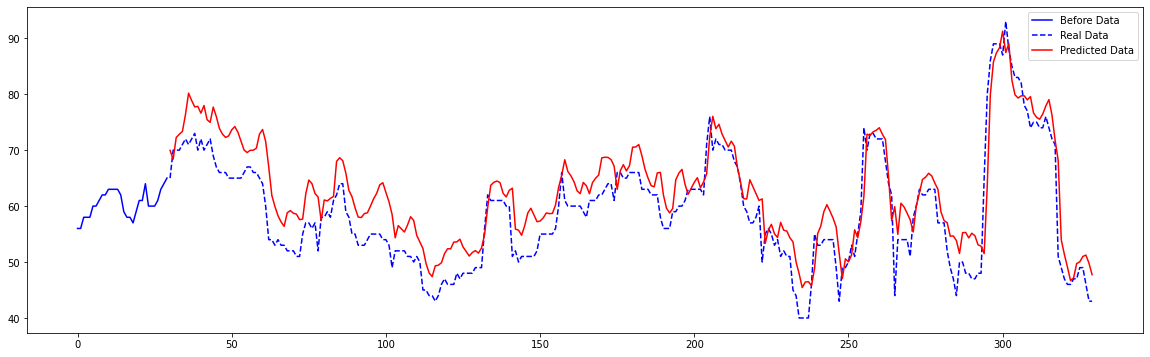

In [69]:
plt.figure(figsize=(20,6))
plt.plot(range(0,30),before_aqi,'b',label='Before Data')
plt.plot(range(30,330),true_aqi,'b--',label='Real Data')
plt.plot(range(30,330),pred_aqi,'r-',label='Predicted Data')
plt.legend()

### Forecasting for the second day

In [78]:
X_input = X_test[-301:]
X_input.shape

(301, 40, 13)

In [79]:
y_input = y_test[-301:]
y_input.shape

(301, 13)

In [99]:
pred_aqi = []
true_aqi = []
i=0
step = 1
while i<300:
    temp_inp = X_input[i]
    pred = model.predict(temp_inp.reshape(1,temp_inp.shape[0],temp_inp.shape[1]))
    temp_inp = np.concatenate((temp_inp, pred),axis=0)
    temp_inp = temp_inp[1:]
    pred = model.predict(temp_inp.reshape(1,temp_inp.shape[0],temp_inp.shape[1]))
    
    pred_aqi.append(pred[0,-1])
    true_aqi.append(y_input[i+step,-1])
    
    i = i+1

In [100]:
len(true_aqi),len(pred_aqi)

(300, 300)

In [105]:
pred_aqi[299],true_aqi[299]

(0.088386744, 0.0690376569037656)

In [103]:
before_aqi_sc = sc_y.inverse_transform(y_test[-330:-300,-1].reshape(-1, 1))
true_aqi_sc = sc_y.inverse_transform(np.array(true_aqi).reshape(-1, 1))
pred_aqi_sc = sc_y.inverse_transform(np.array(pred_aqi).reshape(-1, 1))

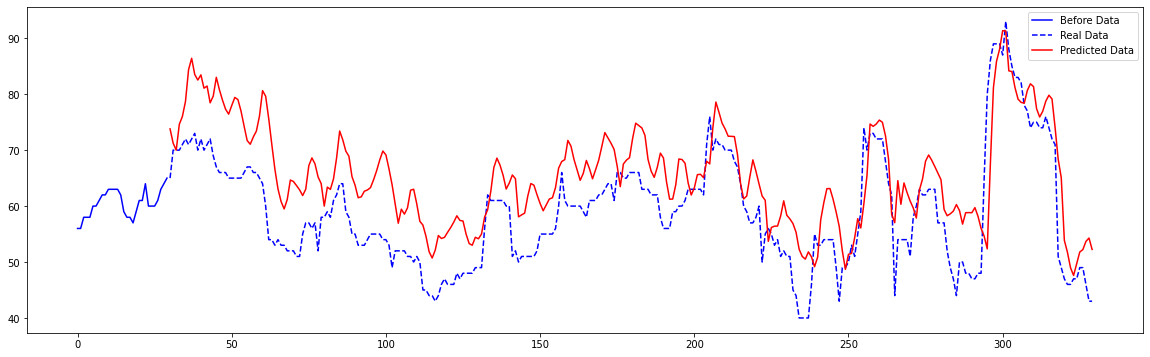

In [106]:
plt.figure(figsize=(20,6))
plt.plot(range(0,30),before_aqi_sc,'b',label='Before Data')
plt.plot(range(30,330),true_aqi_sc,'b--',label='Real Data')
plt.plot(range(30,330),pred_aqi_sc,'r-',label='Predicted Data')
plt.legend()

### Forecasting for the fifth day

In [108]:
step = 5

In [109]:
X_input = X_test[-(300+5):]
X_input.shape

(305, 40, 13)

In [110]:
y_input = y_test[-(300+5):]
y_input.shape

(305, 13)

In [111]:
pred_aqi = []
true_aqi = []
i=0
while i<300:
    temp_inp = X_input[i]

    pred = model.predict(temp_inp.reshape(1,temp_inp.shape[0],temp_inp.shape[1]))
    for j in range(5):
        temp_inp = np.concatenate((temp_inp, pred),axis=0)
        temp_inp = temp_inp[1:]
        pred = model.predict(temp_inp.reshape(1,temp_inp.shape[0],temp_inp.shape[1]))
    
    pred_aqi.append(pred[0,-1])
    true_aqi.append(y_input[i+step,-1])
    
    i = i+1

In [112]:
len(true_aqi),len(pred_aqi)

(300, 300)

In [113]:
before_aqi_sc = sc_y.inverse_transform(y_test[-330:-300,-1].reshape(-1, 1))
true_aqi_sc = sc_y.inverse_transform(np.array(true_aqi).reshape(-1, 1))
pred_aqi_sc = sc_y.inverse_transform(np.array(pred_aqi).reshape(-1, 1))

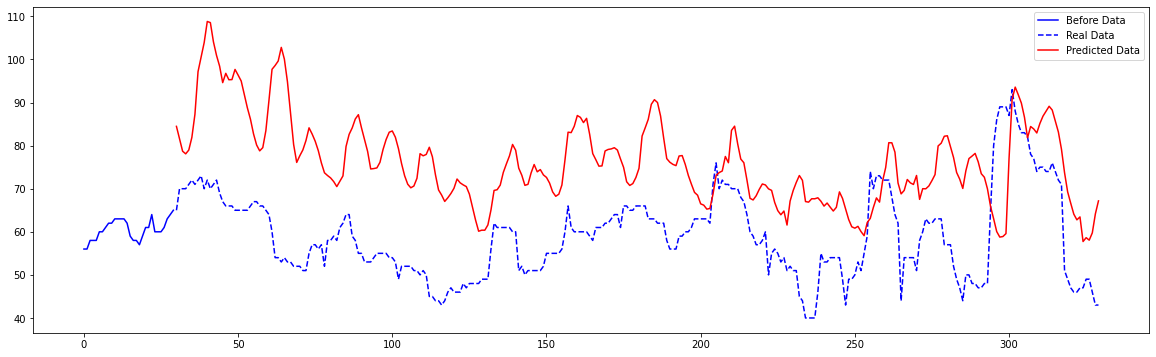

In [114]:
plt.figure(figsize=(20,6))
plt.plot(range(0,30),before_aqi_sc,'b',label='Before Data')
plt.plot(range(30,330),true_aqi_sc,'b--',label='Real Data')
plt.plot(range(30,330),pred_aqi_sc,'r-',label='Predicted Data')
plt.legend()